In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from f_abrir_datos_smn import abrir_datos_smn
from f_graficos_smn import scatter, histograma, stackplot, barplot_oktas_separadas, barplot_oktas_juntas, lineplot_oktas_separadas, lineplot_oktas_juntas, histogramas_partidos, histogramas_partidos_poster 
from f_procesamiento_smn import media_mensual, frecuencia_oktas_por_anio, frecuencia_oktas_por_anio_estaciones,frecuencia_oktas_por_mes, agrupo_frecuencias, agrupo_data

from c_clases_smn import dataframe_smn, frecuencias_oktas
import f_paletas_colores

In [2]:
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

trabajo_en_mi_pc = False
trabajo_en_vegeta = True

if trabajo_en_mi_pc:
    #si estoy trabajando desde mi pc parada en directorio ./Doctorado/codigos/codigos2021/nubosidad
    ruta_a_archivos = "../../../datos/smn/smn_variables_1961-2021/" #ruta donde estan los archivos con datos del smn
    ruta_a_resultados = "../../../resultados/resultados2021/nubosidad/" #ruta donde se guardan los resultados del analisis de nubosidad
     
if trabajo_en_vegeta:
    #si estoy trabajando desde el servidor vegeta
    ruta_a_archivos = "/pikachu/datos/nadia.testani/Doctorado/datos/smn/smn_variables_1961-2021/" #ruta donde estan los archivos con datos del smn
    ruta_a_resultados = "/pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/" #ruta donde se guardan los resultados del analisis de nubosidad
#os.chdir("../../../../../../../../../../")    

Current working directory: /home/nadia.testani/Doctorado/codigos/codigos2021/nubosidad


In [3]:
fecha_inicio_str = "1983-12-15"
fecha_final_str = "2016-11-15"

#fecha_inicio_str = "1983-12"
#fecha_final_str = "2016-11"
#fecha_inicio_str_1 = "1983-12"
#fecha_final_str_1 = "1999-12"
#fecha_inicio_str_2 = "1999-12"
#fecha_final_str_2 = "2015-12"
#fecha_inicio_str_0 = "1967-12"
#fecha_final_str_0 = "1983-12"

#fecha_inicio_str = "1961-01-01"
#fecha_final_str = "2020-12-31"
#fecha_inicio_str_1 = "1983-12"
#fecha_final_str_1 = "1999-12"
#fecha_inicio_str_2 = "1999-12"
#fecha_final_str_2 = "2015-12"
#fecha_inicio_str_0 = "1967-12"
#fecha_final_str_0 = "1983-12"

#fecha_inicio_str = "2014-01-01"
#fecha_final_str = "2021-01-01"
#fecha_inicio_str_1 = "1983-12"
#fecha_final_str_1 = "1999-12"
#fecha_inicio_str_2 = "1999-12"
#fecha_final_str_2 = "2015-12"
#fecha_inicio_str_0 = "1967-12"
#fecha_final_str_0 = "1983-12"

In [4]:
nombres_archivos = os.listdir(ruta_a_archivos)
data = {}
for nombre_archivo in nombres_archivos:
    id_data = abrir_datos_smn(ruta_a_archivos = ruta_a_archivos, nombre_archivo = nombre_archivo, 
                              variable = "nub")
    data[id_data[0]] = id_data[1]

ides_omm = list(data.keys())


In [5]:
porcentaje_na_admitido = 20

In [6]:
print("####### Manejo de directorios #######")
print("\n")
print(f"se para en el directorio llamado: {ruta_a_resultados}")
os.chdir(ruta_a_resultados) #se para en ruta general de resultados de nubosidad
print("\n")

if "nubosidad_observada" not in os.listdir():
    print(f"genera directorio llamado: nubosidad_observada en {ruta_a_resultados}")
    os.mkdir("nubosidad_observada")
else:
    print(f"se para en el directorio llamado: nubosidad_observada en {ruta_a_resultados}")
os.chdir("./nubosidad_observada") #se para en nubosidad_observada
print("\n")

if "smn" not in os.listdir():
    print(f"genera directorio llamado: smn en {ruta_a_resultados}nubosidad_observada")
    os.mkdir("smn")
else:
    print(f"se para en el directorio llamado: smn en {ruta_a_resultados}nubosidad_observada")
os.chdir("./smn") #se para en smn
print("\n")

if "data_mensual" not in os.listdir():
    print(f"genera directorio llamado: data_mensual en {ruta_a_resultados}nubosidad_observada/smn")
    os.mkdir("data_mensual")
else:
    print(f"se para en el directorio llamado: data_mensual en {ruta_a_resultados}nubosidad_observada/smn")
os.chdir("./data_mensual") #se para en data_mensual
print("\n")

if f"admite_{porcentaje_na_admitido}porc_na" not in os.listdir():
    print(f"genera directorio llamado: admite_{porcentaje_na_admitido}porc_na en {ruta_a_resultados}nubosidad_observada/smn/data_mensual")
    os.mkdir(f"admite_{porcentaje_na_admitido}porc_na")
else:
    print(f"se para en el directorio llamado: admite_{porcentaje_na_admitido}porc_na en {ruta_a_resultados}nubosidad_observada/smn/data_mensual")
directorio_na = f"admite_{porcentaje_na_admitido}porc_na"
os.chdir("./"+directorio_na) #se para en admite_{porcentaje_na_admitido}porc_na
print("\n")

if "series_diario" not in os.listdir():
    print(f"genera directorio llamado: series_diario en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
    os.mkdir("series_diario")
else:
    print(f"se para en el directorio llamado: series_diario en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
os.chdir("./series_diario") #se para en series_diario, aca se van a guardar los resultados 
print("\n")    

####### Manejo de directorios #######


se para en el directorio llamado: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/


se para en el directorio llamado: nubosidad_observada en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/


se para en el directorio llamado: smn en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada


se para en el directorio llamado: data_mensual en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn


se para en el directorio llamado: admite_20porc_na en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual


se para en el directorio llamado: series_diario en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na




In [ ]:
### Lo hago para 87166

In [7]:
#for id_omm in ides_omm:

id_omm = 87166
os.chdir("../") #se mueve uno atras: a admite_porc_na
if "datos" not in os.listdir():
    print(f"genera directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
    os.mkdir("datos")
else:
    print(f"se para en el directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
    os.chdir("./datos") #se para en datos, aca se van a guardar los resultados 
print("\n")    
df_data = data[id_omm]


if f"frecuencia_mensual_en_dias_{id_omm}.csv" not in os.listdir():
    print(f"genera un archivo: frecuencia_mensual_en_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
    frecuencia_mensual = frecuencia_oktas_por_mes(id_omm, df_data, ".")[0]
else:
    frecuencia_mensual = pd.read_csv(f"frecuencia_mensual_en_dias_{id_omm}.csv", index_col="fecha")


if f"frecuencia_relativa_mensual_en_dias_{id_omm}.csv" not in os.listdir():
    print(f"genera un archivo: frecuencia_relativa_mensual_en_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
    frecuencia_relativa_mensual = frecuencia_oktas_por_mes(id_omm, df_data, ".")[1]
else:
    frecuencia_relativa_mensual = pd.read_csv(f"frecuencia_relativa_mensual_en_dias_{id_omm}.csv", index_col="fecha")

directorio_raiz = "../series_diario"
os.chdir(directorio_raiz)
print(f"Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: {os.getcwd()}") 

se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario


## CLIMATOLOGIA

**Calculo la climatología de nubosidad en la estación usando la frecuencia relativa mensual. Seria: el porcentaje de dias del mes que caen en cada okta para cada okta. Uso esta serie (un valor para cada mes para cada anio). Y con eso expongo la climatología de distintas maneras**

### Calculo la media mensual 

In [8]:
frecuencia_relativa_mensual.index = pd.to_datetime(frecuencia_relativa_mensual.index)
frecuencia_relativa_mensual_fechas_climatologia = frecuencia_relativa_mensual.loc[fecha_inicio_str:fecha_final_str]
frecuencia_relativa_mensual_climatologia = frecuencia_relativa_mensual_fechas_climatologia.groupby(frecuencia_relativa_mensual_fechas_climatologia.index.month).mean() 
frecuencia_relativa_mensual_climatologia

,0,1,2,3,4,5,6,7,8
fecha,,,,,,,,,
1,8.406647,16.617791,13.782991,11.925709,11.730205,10.752688,11.436950,10.263930,5.083089
2,7.822063,17.446634,14.804448,11.374832,11.050157,9.064786,10.296313,9.437976,8.702791
3,10.948192,20.527859,13.587488,8.797654,9.775171,11.436950,8.699902,8.406647,7.820137
4,16.767677,12.222222,8.888889,8.585859,9.797980,10.909091,11.010101,9.090909,12.727273
5,15.835777,12.609971,9.872923,11.632454,8.895406,10.263930,8.895406,8.699902,13.294233
6,12.929293,10.606061,8.181818,7.979798,7.676768,11.515152,11.313131,12.222222,17.575758
7,20.723363,9.970674,11.045943,8.504399,9.188661,9.286413,9.384164,8.602151,13.294233
8,23.264907,11.241447,10.263930,7.331378,9.090909,10.557185,7.722385,5.278592,15.249267
9,18.787879,12.727273,10.707071,7.070707,8.989899,10.303030,8.080808,7.878788,15.454545


**Si sumo la frecuencia media de cada okta en cada mes suma suma 100%. Es decir: tomo enero y sumo la frecuencia relativa de cada okta. Y así **

In [9]:
for i in range(0,12):
    if sum(frecuencia_relativa_mensual_climatologia.iloc[i]) > 92: continue
    else: print("La suma de las frecuencias en el mes", i+1, "no es mayor a 98")

In [ ]:
##VER ESTO PARA OBERA

### Agrupamiento

Una vez calculada la media climatológica, agrupo las oktas (sumo las frecuencias relativas medias para cada mes de las oktas de un grupo)

In [10]:
from f_procesamiento_smn import agrupo_frecuencias

In [11]:
frecuencia_relativa_mensual_grupo1_climatologia = agrupo_frecuencias(frecuencia_relativa_mensual_climatologia, grupo = 1)
frecuencia_relativa_mensual_grupo2_climatologia = agrupo_frecuencias(frecuencia_relativa_mensual_climatologia, grupo = 2)

## Graficos

### 1) MEDIAS MENSUALES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import f_paletas_colores
from c_clases_smn import dataframe_smn, frecuencias_oktas


In [ ]:
import matplotlib.pyplot as plt

def stacked_plot_barras_climatologia(frecuencias = frecuencia_relativa_mensual_climatologia, id_omm = id_omm,  
                                     colores = f_paletas_colores.paleta_9_colores, agrupo = None,
                                     anio_inicio = 1983, anio_final = 2016):
    
    if id_omm == 87148:
        nombre_estacion = "Roque Saenz Peña"
    elif id_omm == 87166:
        nombre_estacion = "Corrientes"
    elif id_omm == 87270:
        nombre_estacion = "Reconquista Aero"
    elif id_omm == 87395:
        nombre_estacion = "Concordia Aero"
    elif id_omm == 87393:
        nombre_estacion = "Montecaseros"
    elif id_omm == 87289:
        nombre_estacion = "Paso de los Libres Aero"
    elif id_omm == 87178:
        nombre_estacion = "Posadas Aero"
    elif id_omm == 87187:
        nombre_estacion = "Oberá"
    elif id_omm == 87155:
        nombre_estacion = "Resistencia Aero"
    elif id_omm == 87173:
        nombre_estacion = "Ituzaingó"
    elif id_omm == 87281:
        nombre_estacion = "Mercedes Aero"
    else:
        nombre_estacion = " "
    
    width = 0.98      # the width of the bars: can also be len(x) sequence
    labels = ['J', 'F', 'M', 'A', 'M', "J", "J", "A", "S", "O","N", "D"]
    
    plt.figure(num=1, figsize=(8, 5), dpi=200)
    ax = plt.gca()
    ax.set_facecolor('#E7E7DE')
    
    
    if agrupo == None:
        ax.bar(frecuencias.index, np.array(frecuencias).transpose()[0], width,
               label='0', color = colores[0])
        for okta in range(1,9):
            ax.bar(frecuencias.index, np.array(frecuencias).transpose()[okta], width, 
                       bottom=sum(np.array(frecuencias).transpose()[0:okta]),
                       label=str(okta), color = colores[okta])
    elif agrupo == 1:
        ax.bar(frecuencias.index, np.array(frecuencias).transpose()[0], width,
               label='0', color = colores[0])
        labels=["0","1-2","3-4","5-6","7-8"]
        for okta in range(1,5):
            ax.bar(frecuencias.index, np.array(frecuencias).transpose()[okta], width, 
                       bottom=sum(np.array(frecuencias).transpose()[0:okta]),
                       label=labels[okta], color = colores[okta])
    elif agrupo == 2:
        ax.bar(frecuencias.index, np.array(frecuencias).transpose()[0], width,
               label='0-1-2', color = colores[0])
        labels=["0-1-2","3-4-5","6-7-8"]
        for okta in range(1,3):
            ax.bar(frecuencias.index, np.array(frecuencias).transpose()[okta], width, 
                       bottom=sum(np.array(frecuencias).transpose()[0:okta]),
                       label=labels[okta], color = colores[okta])
    handles, labels = ax.get_legend_handles_labels() #para poder invertir el orden de las oktas en la leyenda

    ax.set_ylabel('Frequency %')
    ax.legend(handles[::-1], labels[::-1], title='Okta', bbox_to_anchor=(1.1, 1), prop={'size': 8})

    plt.ylim(0, 100)
    plt.xlim(frecuencias.index[0]-0.5, frecuencias.index[-1]+0.5)
    ax.set_xticks(frecuencias.index)
    ax.set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])
                        
    plt.xlabel("Month")
    plt.title(f"Climatology of monthly frequency of daily total cloud cover ({anio_inicio}-{anio_final}) SMN \n {nombre_estacion} ({id_omm})")
    

    if agrupo:
        plt.savefig(f"CLIMATOLOGIA_stackedarea_barras_relativa_{id_omm}_grupo{agrupo}.png")
    else:
        plt.savefig(f"CLIMATOLOGIA_stackedarea_barras_relativa_{id_omm}.png")
            
    plt.show()
    


In [ ]:
def barplot_oktas_separadas_climatologia(frecuencias, id_omm,
                                         colores = f_paletas_colores.paleta_9_colores,
                                         anio_inicio=1983, anio_final=2016):
    if id_omm == 87148:
        nombre_estacion = "Roque Saenz Peña"
    elif id_omm == 87166:
        nombre_estacion = "Corrientes"
    elif id_omm == 87270:
        nombre_estacion = "Reconquista Aero"
    elif id_omm == 87395:
        nombre_estacion = "Concordia Aero"
    elif id_omm == 87393:
        nombre_estacion = "Montecaseros"
    elif id_omm == 87289:
        nombre_estacion = "Paso de los Libres Aero"
    elif id_omm == 87178:
        nombre_estacion = "Posadas Aero"
    elif id_omm == 87187:
        nombre_estacion = "Oberá"
    elif id_omm == 87155:
        nombre_estacion = "Resistencia Aero"
    elif id_omm == 87173:
        nombre_estacion = "Ituzaingó"
    elif id_omm == 87281:
        nombre_estacion = "Mercedes Aero"
    else:
        nombre_estacion = " "
    

    oktas = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    fig, ax = plt.subplots(3, 3, figsize=[9, 7], dpi=200)
    plt.suptitle(f"Climatology of monthly frequency of daily total cloud cover ({anio_inicio}-{anio_final}) SMN \n {nombre_estacion} ({id_omm})", size=14)

    ylim = 30

    for i in range(0, 3):
                for j in range(0, 3):
                    
                    ax[i, j].bar(frecuencias.index,np.array(frecuencias).transpose()[3*i+j], 
                                 color = colores[3*i+j], width = 0.9)
                    ax[i, j].set_ylim((0,ylim))
                    ax[i, j].set_yticks(np.arange(0,ylim+1, ylim//5))
                    ax[i, j].set_title(f"Okta = {oktas[3*i+j]}", size = 11)
                    if j == 0: #solo para los del lateral izquierdo pongo el ylabel
                        ax[i, j].set_ylabel("Frequency %")
                    else:
                        ax[i, j].set_yticklabels([])
                    if i == 2: #solo para los de abajo pongo el xlabel
                        ax[i, j].set_xlabel("Month")
                        ax[i,j].set_xticks(frecuencias.index)
                        ax[i,j].set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])
                        #ax[i,j].set_xticklabels(frecuencias.index)
                    else:
                        ax[i,j].set_xticks(frecuencias.index)
                        ax[i, j].set_xticklabels([])
    
    fig.tight_layout()
    
    plt.savefig(f"CLIMATOLOGIA_barplot_oktas_separadas_relativas_{id_omm}.png")    

    plt.show()

### 2) BOXPLOTS

Boxplot para cada categoría (eje y frecuencia de determinada okta en un mes, eje x mes)

Fuente del código:
https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec#:~:text=variables%20to%20explore.-,Categorical%20Distribution%20Plots,in%20a%20selected%20categorical%20variable. 

Acomodo datos de frecuencias mensuales (para cada mes para cada anio 396 datos por okta: 33 frecuencias para cada mes) en las fechas consideradas para hacer la climatologia: Dic1983 a Nov2016. Agrego una columna con el valor del mes: 1, 2, 3, 4 ..., 12 
Despues acomodo todo en un dataframe donde esta el mes en una columna (valor del mes para cada fecha), el valor de la frecuencia mensual de la nubosidad diaria para ese tiempo y el valor de la okta.

**Entonces los boxplots se hacen con todos los valores de las frecuencias mensuales de la nubosidad diaria entre 1983 y 2016. Para cada mes y cada okta un boxplot**

#### Detalles de box Plot 

Limite inferior del box: cuartil 1 (acumula el 25% de la distribución)

Limite superior del box: cuartil 3 (acumula el 75% de la distribución)

Linea central del box: cuartil 2 = mediana (acumula el 50% de la distribución)

Linea inferior: minimo valor excluyendo outliers (Q1 − 1.5 × IQR) donde Q1: cuartil 1, IQR: intervalo intercuartil (Q3-Q1). La constante 1.5 se setea con el parámentro whis

Linea superior: máximo valor excluyendo outliers (Q3 + 1.5 × IQR) donde Q3: cuartil 3, IQR: intervalo intercuartil (Q3-Q1) 


In [ ]:
import seaborn as sns
import datetime as dt

def acomodo_datos_para_seaborn_boxplot(frecuencias, fecha_inicio_str, fecha_final_str):
    meses =  pd.DataFrame(frecuencias.loc[fecha_inicio_str:fecha_final_str].index.month)
    meses = meses.reset_index(drop=True)
    frecuencias_relativas_por_oktas = {}

    nombres_oktas = ("Okta 0", "Okta 1", "Okta 2", "Okta 3", "Okta 4", "Okta 5", "Okta 6", "Okta 7", "Okta 8")
    for i in range(0,9):
        frecuencia_oktai=frecuencias.loc[fecha_inicio_str:fecha_final_str][str(i)].reset_index(drop=True)
        oktai = pd.concat([meses,frecuencia_oktai,pd.Series([i]*len(frecuencia_oktai))], axis=1)
        oktai.columns = ["Month", "Frequency %", "Okta"]
        frecuencias_relativas_por_oktas[nombres_oktas[i]] = oktai

    frecuencia_relativa_y_meses_acomodado = pd.concat([frecuencias_relativas_por_oktas["Okta 0"], 
                                                       frecuencias_relativas_por_oktas["Okta 1"], 
                                                       frecuencias_relativas_por_oktas["Okta 2"],
                                                       frecuencias_relativas_por_oktas["Okta 3"],
                                                       frecuencias_relativas_por_oktas["Okta 4"],
                                                       frecuencias_relativas_por_oktas["Okta 5"],
                                                       frecuencias_relativas_por_oktas["Okta 6"],
                                                       frecuencias_relativas_por_oktas["Okta 7"],
                                                       frecuencias_relativas_por_oktas["Okta 8"]])
    return frecuencia_relativa_y_meses_acomodado
    
def boxplots_climatologia(frecuencias, id_omm, fecha_inicio_str, fecha_final_str,
                          colores = f_paletas_colores.paleta_9_colores):
    
    frecuencias_acomodadas = acomodo_datos_para_seaborn_boxplot(frecuencias,fecha_inicio_str, fecha_final_str)

    if id_omm == 87148:
        nombre_estacion = "Roque Saenz Peña"
    elif id_omm == 87166:
        nombre_estacion = "Corrientes"
    elif id_omm == 87270:
        nombre_estacion = "Reconquista Aero"
    elif id_omm == 87395:
        nombre_estacion = "Concordia Aero"
    elif id_omm == 87393:
        nombre_estacion = "Montecaseros"
    elif id_omm == 87289:
        nombre_estacion = "Paso de los Libres Aero"
    elif id_omm == 87178:
        nombre_estacion = "Posadas Aero"
    elif id_omm == 87187:
        nombre_estacion = "Oberá"
    elif id_omm == 87155:
        nombre_estacion = "Resistencia Aero"
    elif id_omm == 87173:
        nombre_estacion = "Ituzaingó"
    elif id_omm == 87281:
        nombre_estacion = "Mercedes Aero"
    else:
        nombre_estacion = " "

    plt.figure(num=1, figsize=(12, 6), dpi=200) #
    ax = plt.gca()
    ax = sns.boxplot(x = "Month", y="Frequency %", data=frecuencias_acomodadas, 
                     hue="Okta", palette=colores, fliersize = 2,
                     linewidth = 1.2, whis = 1.5 ) #, size=1.5
    ax.set_ylim([0, 60])
    handles, labels = ax.get_legend_handles_labels() #para poder invertir el orden de las oktas en la leyenda
    ax.legend(handles[::-1], labels[::-1], title='Okta', bbox_to_anchor=(1.1, 1), prop={'size': 8})        
    plt.title(f"Climatology of monthly frequency of daily total cloud cover ({fecha_inicio_str[0:4]}-{fecha_final_str[0:4]}) SMN \n {nombre_estacion} ({id_omm})", size=14)
    
    plt.savefig(f"CLIMATOLOGIA_boxplots_oktas_separadas_relativas_{id_omm}.png")    

    plt.show()
    

In [ ]:
#Ejecuto

def ejecuto_graficos_climatologia_nubosidad_diaria_freq_mensual():
    
    #stacked BARRAS
    stacked_plot_barras_climatologia(frecuencias = frecuencia_relativa_mensual_climatologia,
                                     agrupo = None, anio_inicio = fecha_inicio_str[0:4], 
                                     anio_final = fecha_final_str[0:4])

    stacked_plot_barras_climatologia(frecuencias = frecuencia_relativa_mensual_grupo1_climatologia,
                                     agrupo = 1, anio_inicio = fecha_inicio_str[0:4], 
                                     anio_final = fecha_final_str[0:4])

    stacked_plot_barras_climatologia(frecuencias = frecuencia_relativa_mensual_grupo2_climatologia,
                                     agrupo = 2, anio_inicio = fecha_inicio_str[0:4], 
                                     anio_final = fecha_final_str[0:4])

    #barplots
    barplot_oktas_separadas_climatologia(frecuencias = frecuencia_relativa_mensual_climatologia, 
                                         id_omm = id_omm,colores = f_paletas_colores.paleta_9_colores, 
                                         anio_inicio = fecha_inicio_str[0:4], 
                                         anio_final = fecha_final_str[0:4])
    #boxplots
    boxplots_climatologia(frecuencias = frecuencia_relativa_mensual, id_omm = id_omm,
                          fecha_inicio_str = fecha_inicio_str , fecha_final_str = fecha_final_str,
                          colores = f_paletas_colores.paleta_9_colores)



ejecuto_graficos_climatologia_nubosidad_diaria_freq_mensual()

Veo que en invierno aumentan las frecuencias extremas de nubosidad, pero no puedo decir que haya mas o menos nubosidad. Nubosidad por pasaje de frentes, estratiforme en invierno. En verano la nubosidad está más relacionada con la inestabilidad, es menos probable encontrar dias totalmente nublados o totalmente despejados

## ANOMALIAS

A cada valor mensual de frecuencia de nubosidad, le resto la climatología del respectivo mes.

In [12]:
def f_serie_anomalias_mensuales(frecuencia_relativa_mensual, frecuencia_relativa_mensual_climatologia):
    frecuencia_relativa_anomalia = frecuencia_relativa_mensual.copy()
    for fecha in frecuencia_relativa_anomalia.index:
        for mes in frecuencia_relativa_anomalia.index.month.unique():
            if fecha.month == mes:
                frecuencia_relativa_anomalia.loc[fecha] = frecuencia_relativa_mensual.loc[fecha]-frecuencia_relativa_mensual_climatologia.loc[mes]
    return frecuencia_relativa_anomalia

frecuencia_relativa_anomalia = f_serie_anomalias_mensuales(frecuencia_relativa_mensual, frecuencia_relativa_mensual_climatologia)

In [14]:
def promedio_movil(serie, ventana):
    lista_salida = [None] * len(serie)
    for i in range(0, len(serie) - ventana):
        lista_salida [i + int(ventana / 2)] = np.nanmean(serie[i:i + ventana])      
    return(lista_salida)

ventana = 12
frecuencia_relativa_anomalia_media_movil_12_dic = {}
for i in range(0, 9):
    frecuencia_relativa_anomalia_media_movil_12_dic[str(i)] = promedio_movil(frecuencia_relativa_anomalia[str(i)], ventana)

frecuencia_relativa_anomalia_media_movil_12 = pd.DataFrame(frecuencia_relativa_anomalia_media_movil_12_dic)
frecuencia_relativa_anomalia_media_movil_12.index = frecuencia_relativa_anomalia.index

ventana_5 = 12*5
frecuencia_relativa_anomalia_media_movil_12_5_dic = {}
for i in range(0, 9):
    frecuencia_relativa_anomalia_media_movil_12_5_dic[str(i)] = promedio_movil(frecuencia_relativa_anomalia[str(i)], ventana_5)

frecuencia_relativa_anomalia_media_movil_12_5 = pd.DataFrame(frecuencia_relativa_anomalia_media_movil_12_5_dic)
frecuencia_relativa_anomalia_media_movil_12_5.index = frecuencia_relativa_anomalia.index


In [15]:
#agrego tendencias
#from scipy.interpolate import make_interp_spline
import pymannkendall as mk

#tendencia lineal por cuadrados minimos
def tendencia(serie):
    
    valores = serie.values[np.isfinite(serie.values)]
    fechas = np.arange(0, len(serie), 1)[np.isfinite(serie.values)]
    
    # si el vector es todo de nan entonces que no calcule la tendencia, y que devuelva nan
    if valores.size <= 1:
        tendencia = np.nan
        significativo = np.nan
        
    # si el vector tiene valores distintos de nan calcula tendencia y significancia
    elif valores.size > 1:
        coef = np.polyfit(fechas, valores, 1)
        tendencia = coef[0]  # dada entre un intervalo de tiempo. A esta salida si quiero tendencia decadal e ingrese datos de toda la serie mensual lo multiplico por 10*12 y si quiero por decada y vienen dados por un dato anual se multiplica por 10
        coord_origen = coef[1]
        z_test = mk.original_test(valores, alpha = 0.05)[3]
        if abs(z_test) >= 1.96:
            significativo = True
        elif abs(z_test) < 1.96:
            significativo = False
    return(coord_origen, tendencia, significativo)


#fecha_prueba_0 = "1983-11-01"
#fecha_prueba_1 = "2016-12-01"
#print(tendencia(frecuencia_relativa_anomalia.loc[fecha_prueba_0:fecha_prueba_1]["0"])) #tendencia mensual
#tendencia_decadal = tendencia(frecuencia_relativa_anomalia.loc[fecha_prueba_0:fecha_prueba_1]["0"])[1]*10*12 # anual


In [16]:
#agrego tendencias
#from scipy.interpolate import make_interp_spline
import scipy

#tendencia lineal por metodo theil-sen
def tendencia_theil_sen(serie):
    
    valores = serie.values[np.isfinite(serie.values)]
    fechas = np.arange(0, len(serie), 1)[np.isfinite(serie.values)]
    
    # si el vector es todo de nan entonces que no calcule la tendencia, y que devuelva nan
    if valores.size <= 1:
        tendencia = np.nan
        significativo = np.nan
        
    # si el vector tiene valores distintos de nan calcula tendencia y significancia
    elif valores.size > 1:
        coef = scipy.stats.mstats.theilslopes(y=valores, x=fechas, alpha=0.95)
        tendencia = coef[0]  # dada entre un intervalo de tiempo. A esta salida si quiero tendencia decadal e ingrese datos de toda la serie mensual lo multiplico por 10*12 y si quiero por decada y vienen dados por un dato anual se multiplica por 10
        coord_origen = coef[1]
        z_test = mk.original_test(valores, alpha = 0.05)[3]
        if abs(z_test) >= 1.96:
            significativo = True
        elif abs(z_test) < 1.96:
            significativo = False
    return(coord_origen, tendencia, significativo)

#fecha_prueba_0 = "1983-11-01"
#fecha_prueba_1 = "2016-12-01"
#print(tendencia_theil_sen(frecuencia_relativa_anomalia.loc[fecha_prueba_0:fecha_prueba_1]["0"])) #tendencia mensual
#tendencia_decadal = tendencia(frecuencia_relativa_anomalia.loc[fecha_prueba_0:fecha_prueba_1]["0"])[1]*10*12 # anual


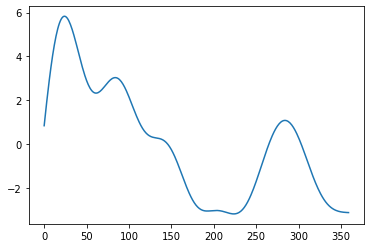

In [17]:
#genero filtro pasa bajas con metodo de butterworth

from scipy.signal import butter
from scipy import signal

# La tasa o frecuencia de muestreo es el número de
# muestras por unidad de tiempo que se toman de una señal continua 
#para producir una señal discreta

def butter_bandpass(serie, highcut_periodo, sampling_freq = 1, order_butter = 10):
    nyq = 0.5 * sampling_freq #frecuencia de nyquist
    highcut_frecuencia = 1 / highcut_periodo
    high = highcut_frecuencia / nyq
    b, a = signal.butter(order_butter, high, "low")
    y = signal.filtfilt(b, a, serie) 
    return y

fecha_prueba_0 = "1986-12-01"
fecha_prueba_1 = "2016-11-01"
x = frecuencia_relativa_anomalia.loc[fecha_prueba_0:fecha_prueba_1]["0"]
periodo_a_filtrar = 5*12 #critical period 5*12 pienso en 5 años 

veo = butter_bandpass(x, periodo_a_filtrar)
plt.plot(veo)


In [18]:
def barplot_oktas_separadas_RELATIVO(frecuencias, frecuencias_media_movil_12, frecuencias_media_movil_12_5, id_omm, fecha_inicio_str, fecha_final_str, 
                                    colores = f_paletas_colores.paleta_9_colores, incluir_tendencia_ms =  False, 
                                    incluir_tendencia_ts =  False, incluir_pasabaja = False, 
                                    incluir_media_movil_12 = True,
                                    incluir_media_movil_12_5 = False):
    if id_omm == 87148:
        nombre_estacion = "Roque Saenz Peña"
    elif id_omm == 87166:
        nombre_estacion = "Corrientes"
    elif id_omm == 87270:
        nombre_estacion = "Reconquista Aero"
    elif id_omm == 87395:
        nombre_estacion = "Concordia Aero"
    elif id_omm == 87393:
        nombre_estacion = "Montecaseros"
    elif id_omm == 87289:
        nombre_estacion = "Paso de los Libres Aero"
    elif id_omm == 87178:
        nombre_estacion = "Posadas Aero"
    elif id_omm == 87187:
        nombre_estacion = "Oberá"
    elif id_omm == 87155:
        nombre_estacion = "Resistencia Aero"
    elif id_omm == 87173:
        nombre_estacion = "Ituzaingó"
    elif id_omm == 87281:
        nombre_estacion = "Mercedes Aero"
    else:
        nombre_estacion = " "
    instancia_frecuencia = frecuencias_oktas(frecuencias)
    frecuencias = instancia_frecuencia.selecciono_fechas(fecha_inicio_str, fecha_final_str)

    #instancia_frecuencia_media_movil = frecuencias_oktas(frecuencias_media_movil)
    #frecuencias_media_movil = instancia_frecuencia_media_movil.selecciono_fechas(fecha_inicio_str, fecha_final_str)
    
    oktas = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    fig, ax = plt.subplots(3, 3, figsize=[9, 7], dpi=200)
    plt.suptitle(f"Anomaly of daily mean total cloud cover (oktas) monthly frequency SMN \n {nombre_estacion} ({id_omm})", size=14)
    
    ylim = 24

    for i in range(0, 3):
                for j in range(0, 3):
                    #ax[i, j].set_facecolor('#E7E7DE')
                    ax[i,j].axhline(0, color = "darkgrey")
                    ax[i, j].bar(frecuencias.index,np.array(frecuencias).transpose()[3*i+j], 
                                 color = colores[3*i+j], width = 7)
                    if incluir_media_movil_12 == True:
                        ax[i, j].plot(frecuencias.index, 
                                       np.array(frecuencias_media_movil_12).transpose()[3*i+j],
                                       color = colores[3*i+j], alpha= 0.9)
                    if incluir_tendencia_ms == True:
                        #calculo tendencias lineal por cuadrados minimos
                        tendencia_okta = tendencia(frecuencias.loc[fecha_inicio_str:fecha_final_str][str(3*i+j)])
                        pendiente = tendencia_okta[1]
                        origen = tendencia_okta[0]
                        significativo = tendencia_okta[2]
                        grafico_tendencia = origen + pendiente * np.arange(0, len(frecuencias.index), 1)
                        ax[i,j].text(12000, 20, f"MS: {round(pendiente*10*12, 2)} %/dec",color="r", 
                                     ha="center", va = "center", fontsize =  'small',
                                     weight='bold') #horizontalalignment='center', verticalalignment='center'
                    if incluir_tendencia_ts == True:
                        #calculo tendencias lineal por theil sen
                        tendencia_okta_sen = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str][str(3*i+j)])
                        pendiente_sen = tendencia_okta_sen[1]
                        origen_sen = tendencia_okta_sen[0]
                        significativo_sen = tendencia_okta_sen[2]
                        grafico_tendencia_sen = origen_sen + pendiente_sen * np.arange(0, len(frecuencias.index), 1)
                        ax[i,j].text(12000, 17, f"{round(pendiente_sen*10*12, 2)} %/dec",color="red", 
                                     ha="center", va = "center", fontsize =  'small',
                                     weight='bold') #horizontalalignment='center', verticalalignment='center'
                    
                    
                    
                    if incluir_tendencia_ms == True:   
                        #grafico tendencia lineal por cuadrados minimos
                        if tendencia_okta[2] == True:
                            ax[i, j].plot(frecuencias.index, 
                                           grafico_tendencia,
                                           color = "red", alpha = 0.9)
                        else:
                            ax[i, j].plot(frecuencias.index, 
                                           grafico_tendencia,
                                           color = "red", alpha = 0.9, ls = ":")
                    if incluir_tendencia_ts == True:
                        #grafico tendencia lineal por thail-sen
                        if tendencia_okta_sen[2] == True:
                            ax[i, j].plot(frecuencias.index, 
                                           grafico_tendencia_sen,
                                           color = "red", alpha = 0.9)
                        else:
                            ax[i, j].plot(frecuencias.index, 
                                           grafico_tendencia_sen,
                                           color = "red", alpha = 0.9, ls = ":")
                        
                    #grafico filtro pasa bajas
                    if incluir_pasabaja == True:
                        periodo_a_filtrar = 5*12 #critical period 5*12 pienso en 5 años 
                        serie_butter = butter_bandpass(frecuencias.loc[fecha_inicio_str:fecha_final_str][str(3*i+j)], 
                                                       periodo_a_filtrar)
                        ax[i, j].plot(frecuencias.index, 
                                      serie_butter,
                                      color = "k")
                        
                    if incluir_media_movil_12_5 == True:
                        ax[i, j].plot(frecuencias.index, 
                                       np.array(frecuencias_media_movil_12_5).transpose()[3*i+j],
                                       color = "red", alpha= 0.9)
                    
                    #else:
                    #    ax[i,j].axhline(0, color = "darkgrey")
                    #    ax[i, j].bar(frecuencias.index,np.array(frecuencias).transpose()[3*i+j], 
                    #                 color = colores[3*i+j], width = 7)
                    #    ax[i, j].plot(frecuencias.index, 
                    #                   np.array(frecuencias_media_movil_12).transpose()[3*i+j],
                    #                   color = colores[3*i+j], alpha= 0.9)
                    
                    
                    ax[i, j].set_ylim((-ylim,ylim))
                    ax[i, j].set_yticks(np.arange(-ylim,ylim+1, ylim//2))
                    ax[i, j].set_title(f"Okta = {oktas[3*i+j]}", size = 11)
                    
                    if j == 0: #solo para los del lateral izquierdo pongo el ylabel
                        ax[i, j].set_ylabel("Frequency anomaly %")
                    else:
                        ax[i, j].set_yticklabels([])
                    
                    if int(fecha_final_str[0:4])-int(fecha_inicio_str[0:4]) <= 3 :
                        intervalo_fechas = (int(fecha_final_str[0:4])-int(fecha_inicio_str[0:4]))*5 #6
                    else:
                        intervalo_fechas = (int(fecha_final_str[0:4])-int(fecha_inicio_str[0:4]))*3
                    
                    if i == 2: #solo para los de abajo pongo el xlabel
                        ax[i, j].set_xlabel("Date")
                        ax[i,j].set_xticks(frecuencias.index[::intervalo_fechas])
                        ax[i,j].set_xticklabels(frecuencias.index.year[::intervalo_fechas])
                    else:
                        ax[i,j].set_xticks(frecuencias.index[::intervalo_fechas])
                        ax[i, j].set_xticklabels([])
                        
    fig.tight_layout()
    plt.savefig(f"barplot_oktas_separadas_relativa_anomalia_{id_omm}_{fecha_inicio_str}_{fecha_final_str}.png")
    plt.show()

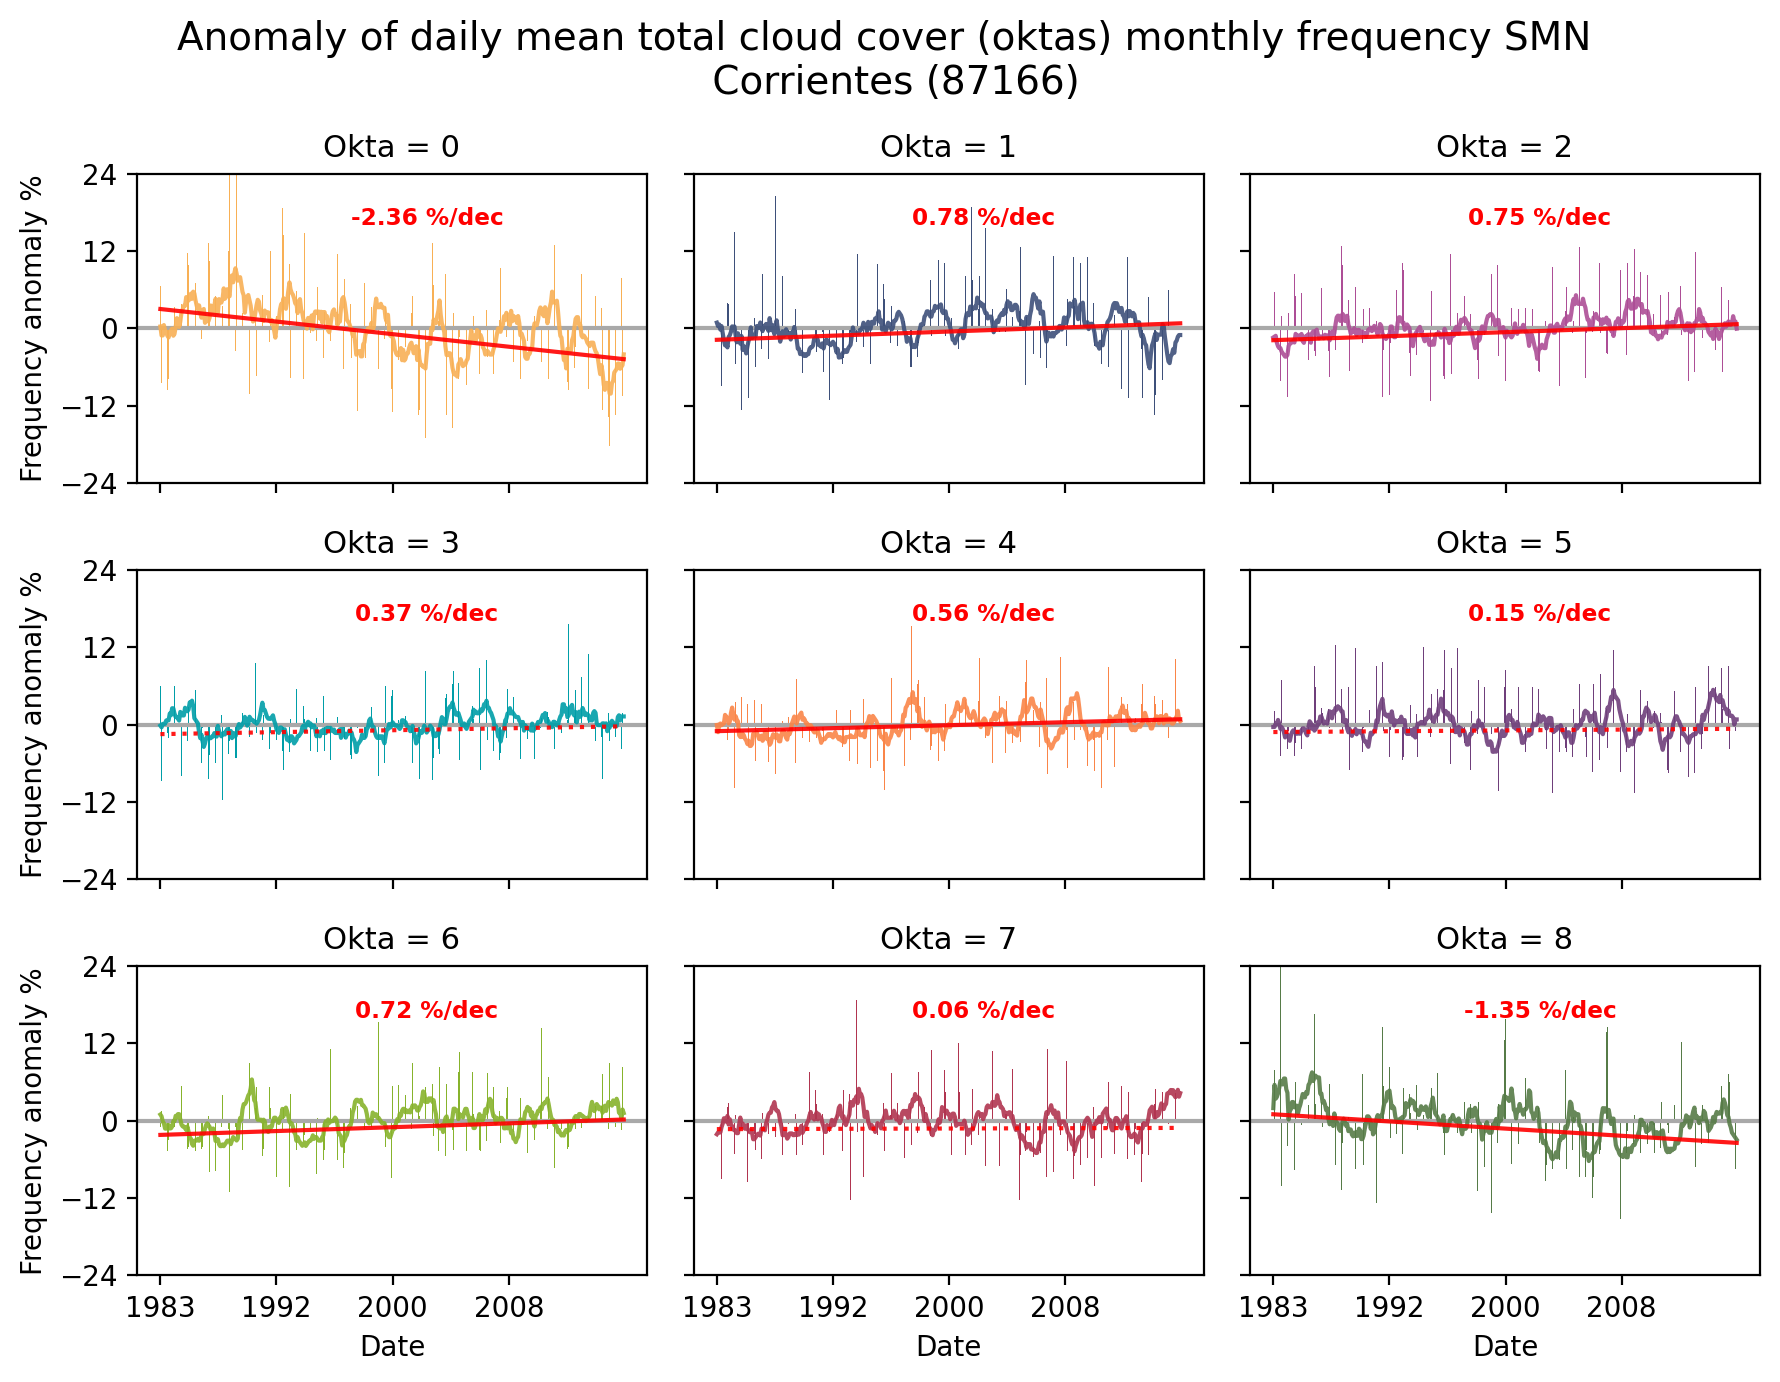

In [19]:
#fecha_prueba_0 = "1961-01-01"
#fecha_prueba_1 = "2021-12-01"
#fecha_prueba_0 = "1983-12-01"
#fecha_prueba_1 = "2016-11-01"
#fecha_prueba_0 = "2019-01-01"
#fecha_prueba_1 = "2021-12-01"

fecha_prueba_0 = "1983-12-01"
fecha_prueba_1 = "2016-11-01"
barplot_oktas_separadas_RELATIVO(frecuencias = frecuencia_relativa_anomalia.loc[fecha_prueba_0:fecha_prueba_1],
                                 frecuencias_media_movil_12 = frecuencia_relativa_anomalia_media_movil_12.loc[fecha_prueba_0:fecha_prueba_1],
                                 frecuencias_media_movil_12_5 = frecuencia_relativa_anomalia_media_movil_12_5.loc[fecha_prueba_0:fecha_prueba_1],
                                 id_omm = id_omm, fecha_inicio_str = fecha_prueba_0, 
                                 fecha_final_str = fecha_prueba_1, 
                                 colores = f_paletas_colores.paleta_9_colores, incluir_tendencia_ms = False,
                                 incluir_tendencia_ts = True,
                                 incluir_pasabaja = False, incluir_media_movil_12 = True,
                                 incluir_media_movil_12_5 = False)



In [20]:
ides_omm
ides_omm_ordenado = [87148, 87166, 87178, 87187, 87270, 87289, 87393, 87395]
#nombres_omm_ordenado = ["Roque Saenz Peña", "Corrientes", "Posadas Aero", "Oberá", "Reconquista Aero",
       #               "Paso de los Libres Aero", "Montecaseros","Concordia Aero"]



In [21]:
#tabla con tendencia
numRows = len(ides_omm_ordenado)
numCols = 9

tabla_tendencias = pd.DataFrame(index=range(numRows),columns=range(numCols))
tabla_tendencias_significativas = pd.DataFrame(index=range(numRows),columns=range(numCols))
for j, id_omm in enumerate(ides_omm_ordenado):
    
    os.chdir("../") #se mueve uno atras: a admite_porc_na
    if "datos" not in os.listdir():
        print(f"genera directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
        os.mkdir("datos")
    else:
        print(f"se para en el directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
        os.chdir("./datos") #se para en datos, aca se van a guardar los resultados 
    print("\n")    
    df_data = data[id_omm]


    if f"frecuencia_mensual_en_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_mensual_en_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_mensual = frecuencia_oktas_por_mes(id_omm, df_data, ".")[0]
    else:
        frecuencia_mensual = pd.read_csv(f"frecuencia_mensual_en_dias_{id_omm}.csv", index_col="fecha")


    if f"frecuencia_relativa_mensual_en_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_relativa_mensual_en_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_relativa_mensual = frecuencia_oktas_por_mes(id_omm, df_data, ".")[1]
    else:
        frecuencia_relativa_mensual = pd.read_csv(f"frecuencia_relativa_mensual_en_dias_{id_omm}.csv", index_col="fecha")

    directorio_raiz = "../series_diario"
    os.chdir(directorio_raiz)
    print(f"Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: {os.getcwd()}") 



    frecuencia_relativa_mensual.index = pd.to_datetime(frecuencia_relativa_mensual.index)
    frecuencia_relativa_mensual_fechas_climatologia = frecuencia_relativa_mensual.loc[fecha_inicio_str:fecha_final_str]
    frecuencia_relativa_mensual_climatologia = frecuencia_relativa_mensual_fechas_climatologia.groupby(frecuencia_relativa_mensual_fechas_climatologia.index.month).mean() 
    frecuencia_relativa_mensual_climatologia

    for i in range(0,12):
        if sum(frecuencia_relativa_mensual_climatologia.iloc[i]) > 92: continue
        else: print("La suma de las frecuencias en el mes", i+1, "no es mayor a 98")

    def f_serie_anomalias_mensuales(frecuencia_relativa_mensual, frecuencia_relativa_mensual_climatologia):
        frecuencia_relativa_anomalia = frecuencia_relativa_mensual.copy()
        for fecha in frecuencia_relativa_anomalia.index:
            for mes in frecuencia_relativa_anomalia.index.month.unique():
                if fecha.month == mes:
                    frecuencia_relativa_anomalia.loc[fecha] = frecuencia_relativa_mensual.loc[fecha]-frecuencia_relativa_mensual_climatologia.loc[mes]
        return frecuencia_relativa_anomalia

    frecuencia_relativa_anomalia = f_serie_anomalias_mensuales(frecuencia_relativa_mensual, 
                                                               frecuencia_relativa_mensual_climatologia)


    fecha_inicio_str = "1983-12-01"
    fecha_final_str = "2016-11-01"
    #fecha_inicio_str = "1961-01-01"
    #fecha_final_str = "2020-12-31"
    frecuencias = frecuencia_relativa_anomalia.loc[fecha_inicio_str:fecha_final_str]
    
    tendencia_decadal = []
    for i in range(0, 9):
        #calculo tendencias lineal por theil sen 
        tendencia_okta = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str][str(i)])
        pendiente = tendencia_okta[1]*10*12 #decadal
        significativo = tendencia_okta[2]
        tabla_tendencias.iloc[j,i] = round(pendiente, 2) #filas, columnas
        tabla_tendencias_significativas.iloc[j,i] = significativo

#nombres_omm = ["Oberá", "Posadas Aero", "Roque Saenz Peña", "Montecaseros",
 #             "Reconquista Aero", "Ituzaingó", "Paso de los Libres Aero",
 #             "Mercedes Aero", "Corrientes", "Resistencia Aero",
 #             "Concordia Aero"]
nombres_omm_ordenado = ["Roque Saenz Peña", "Corrientes", "Posadas Aero", "Oberá", "Reconquista Aero",
                       "Paso de los Libres Aero", "Montecaseros","Concordia Aero"]

tabla_tendencias.index =  nombres_omm_ordenado
tabla_tendencias_significativas.index = nombres_omm_ordenado
print(tabla_tendencias)
print(tabla_tendencias_significativas)

tabla_tendencias.to_excel("tabla_tendencias_1983-2016.xlsx")
tabla_tendencias_significativas.to_excel("tabla_tendencias_significativas_1983-2016.xlsx")
    

se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario
se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario
se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de 

In [22]:
#tabla con tendencia agrupando oktas: 0, 123, 4, 567, 8
numRows = len(ides_omm_ordenado)
numCols = 5

tabla_tendencias = pd.DataFrame(index=range(numRows),columns=range(numCols))
tabla_tendencias_significativas = pd.DataFrame(index=range(numRows),columns=range(numCols))
for j, id_omm in enumerate(ides_omm_ordenado):
    
    os.chdir("../") #se mueve uno atras: a admite_porc_na
    if "datos" not in os.listdir():
        print(f"genera directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
        os.mkdir("datos")
    else:
        print(f"se para en el directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
        os.chdir("./datos") #se para en datos, aca se van a guardar los resultados 
    print("\n")    
    df_data = data[id_omm]


    if f"frecuencia_mensual_en_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_mensual_en_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_mensual = frecuencia_oktas_por_mes(id_omm, df_data, ".")[0]
    else:
        frecuencia_mensual = pd.read_csv(f"frecuencia_mensual_en_dias_{id_omm}.csv", index_col="fecha")


    if f"frecuencia_relativa_mensual_en_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_relativa_mensual_en_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_relativa_mensual = frecuencia_oktas_por_mes(id_omm, df_data, ".")[1]
    else:
        frecuencia_relativa_mensual = pd.read_csv(f"frecuencia_relativa_mensual_en_dias_{id_omm}.csv", index_col="fecha")

    directorio_raiz = "../series_diario"
    os.chdir(directorio_raiz)
    print(f"Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: {os.getcwd()}") 



    frecuencia_relativa_mensual.index = pd.to_datetime(frecuencia_relativa_mensual.index)
    frecuencia_relativa_mensual_fechas_climatologia = frecuencia_relativa_mensual.loc[fecha_inicio_str:fecha_final_str]
    frecuencia_relativa_mensual_climatologia = frecuencia_relativa_mensual_fechas_climatologia.groupby(frecuencia_relativa_mensual_fechas_climatologia.index.month).mean() 
    frecuencia_relativa_mensual_climatologia
    

    for i in range(0,12):
        if sum(frecuencia_relativa_mensual_climatologia.iloc[i]) > 92: continue
        else: print("La suma de las frecuencias en el mes", i+1, "no es mayor a 98")

    def f_serie_anomalias_mensuales(frecuencia_relativa_mensual, frecuencia_relativa_mensual_climatologia):
        frecuencia_relativa_anomalia = frecuencia_relativa_mensual.copy()
        for fecha in frecuencia_relativa_anomalia.index:
            for mes in frecuencia_relativa_anomalia.index.month.unique():
                if fecha.month == mes:
                    frecuencia_relativa_anomalia.loc[fecha] = frecuencia_relativa_mensual.loc[fecha]-frecuencia_relativa_mensual_climatologia.loc[mes]
        return frecuencia_relativa_anomalia

    frecuencia_relativa_anomalia = f_serie_anomalias_mensuales(frecuencia_relativa_mensual, 
                                                               frecuencia_relativa_mensual_climatologia)

    fecha_inicio_str = "1961-01-01"
    fecha_final_str = "2020-12-31"
    #fecha_inicio_str = "1983-12-01"
    #fecha_final_str = "2016-11-01"
    frecuencias = frecuencia_relativa_anomalia.loc[fecha_inicio_str:fecha_final_str]
    
    #okta 0 
    tendencia_okta_0 = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str]["0"])
    pendiente_0 = tendencia_okta_0[1]*10*12 #decadal
    significativo_0 = tendencia_okta_0[2]
    tabla_tendencias.iloc[j,0] = round(pendiente_0, 2) #filas, columnas
    tabla_tendencias_significativas.iloc[j,0] = significativo_0
    
    #oktas 123
    media_123 = (frecuencias.loc[fecha_inicio_str:fecha_final_str]["1"]+
                frecuencias.loc[fecha_inicio_str:fecha_final_str]["2"]+
                frecuencias.loc[fecha_inicio_str:fecha_final_str]["3"])
    tendencia_okta_123 = tendencia_theil_sen(media_123)
    pendiente_123 = tendencia_okta_123[1]*10*12 #decadal
    significativo_123 = tendencia_okta_123[2]
    tabla_tendencias.iloc[j,1] = round(pendiente_123, 2) #filas, columnas
    tabla_tendencias_significativas.iloc[j,1] = significativo_123
    
    #okta 4
    tendencia_okta_4 = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str]["4"])
    pendiente_4 = tendencia_okta_4[1]*10*12 #decadal
    significativo_4 = tendencia_okta_4[2]
    tabla_tendencias.iloc[j,2] = round(pendiente_4, 2) #filas, columnas
    tabla_tendencias_significativas.iloc[j,2] = significativo_4
    
    #oktas 567
    media_567 = (frecuencias.loc[fecha_inicio_str:fecha_final_str]["5"]+
                frecuencias.loc[fecha_inicio_str:fecha_final_str]["6"]+
                frecuencias.loc[fecha_inicio_str:fecha_final_str]["7"])
    tendencia_okta_567 = tendencia_theil_sen(media_567)
    pendiente_567 = tendencia_okta_567[1]*10*12 #decadal
    significativo_567 = tendencia_okta_567[2]
    tabla_tendencias.iloc[j,3] = round(pendiente_567, 2) #filas, columnas
    tabla_tendencias_significativas.iloc[j,3] = significativo_567
    
    #okta 8
    tendencia_okta_8 = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str]["8"])
    pendiente_8 = tendencia_okta_8[1]*10*12 #decadal
    significativo_8 = tendencia_okta_8[2]
    tabla_tendencias.iloc[j,4] = round(pendiente_8, 2) #filas, columnas
    tabla_tendencias_significativas.iloc[j,4] = significativo_8

#nombres_omm = ["Oberá", "Posadas Aero", "Roque Saenz Peña", "Montecaseros",
 #             "Reconquista Aero", "Ituzaingó", "Paso de los Libres Aero",
 #             "Mercedes Aero", "Corrientes", "Resistencia Aero",
 #             "Concordia Aero"]
    
nombres_omm_ordenado = ["Roque Saenz Peña", "Corrientes", "Posadas Aero", "Oberá", "Reconquista Aero",
                       "Paso de los Libres Aero", "Montecaseros","Concordia Aero"]

tabla_tendencias.index =  nombres_omm_ordenado
tabla_tendencias.columns = ["0", "1-2-3", "4", "5-6-7", "8"]
tabla_tendencias_significativas.index = nombres_omm_ordenado
tabla_tendencias_significativas.columns = ["0", "1-2-3", "4", "5-6-7", "8"]

print(tabla_tendencias)
print(tabla_tendencias_significativas)

tabla_tendencias.to_excel("tabla_tendencias_agrupo_1961-2020.xlsx")
tabla_tendencias_significativas.to_excel("tabla_tendencias_significativas_agrupo_1961-2020.xlsx")

se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario
se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario
se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de 

In [93]:
#tabla con tendencia agrupando oktas: 0, 123, 4, 567, 8 por estacion 
#primero estimo la serie de anomalia relativa por estacion

numRows = len(ides_omm)
numCols = 5

def f_serie_anomalias_mensuales(frecuencia_relativa_DJF, frecuencia_relativa_DJF_climatologia):
    frecuencia_relativa_anomalia_DJF = frecuencia_relativa_DJF.copy()
    for fecha in frecuencia_relativa_anomalia_DJF.index:
        frecuencia_relativa_anomalia_DJF.loc[fecha] = frecuencia_relativa_DJF.loc[fecha]- frecuencia_relativa_DJF_climatologia
 #   frecuencia_relativa_anomalia_DJF = frecuencia_relativa_DJF- frecuencia_relativa_DJF_climatologia
    return frecuencia_relativa_anomalia_DJF

tabla_tendencias = pd.DataFrame(index=range(numRows),columns=range(numCols))
tabla_tendencias_significativas = pd.DataFrame(index=range(numRows),columns=range(numCols))
frecuencuas_relativas_anomalias_por_estacion = {}
for j, id_omm in enumerate(ides_omm_ordenado):
    
    os.chdir("../") #se mueve uno atras: a admite_porc_na
    if "datos" not in os.listdir():
        print(f"genera directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
        os.mkdir("datos")
    else:
        print(f"se para en el directorio llamado: datos en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na")
        os.chdir("./datos") #se para en datos, aca se van a guardar los resultados 
    print("\n")    
    df_data = data[id_omm]

    if f"frecuencia_relativa_anual_DJF_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_relativa_anual_DJF_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_relativa_DJF = frecuencia_oktas_por_anio_estaciones(id_omm, df_data, ".", "DJF")[1]
    else:
        frecuencia_relativa_DJF = pd.read_csv(f"frecuencia_relativa_anual_DJF_dias_{id_omm}.csv", index_col="fecha")
    
    if f"frecuencia_relativa_anual_MAM_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_relativa_anual_MAM_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_relativa_MAM = frecuencia_oktas_por_anio_estaciones(id_omm, df_data, ".", "MAM")[1]
    else:
        frecuencia_relativa_MAM = pd.read_csv(f"frecuencia_relativa_anual_MAM_dias_{id_omm}.csv", index_col="fecha")
    
    if f"frecuencia_relativa_anual_JJA_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_relativa_anual_JJA_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_relativa_JJA = frecuencia_oktas_por_anio_estaciones(id_omm, df_data, ".", "JJA")[1]
    else:
        frecuencia_relativa_JJA = pd.read_csv(f"frecuencia_relativa_anual_JJA_dias_{id_omm}.csv", index_col="fecha")
    
    if f"frecuencia_relativa_anual_SON_dias_{id_omm}.csv" not in os.listdir():
        print(f"genera un archivo: frecuencia_relativa_anual_SON_dias_{id_omm}.csv en {ruta_a_resultados}nubosidad_observada/smn/data_mensual/admite_{porcentaje_na_admitido}porc_na/datos")
        frecuencia_relativa_SON = frecuencia_oktas_por_anio_estaciones(id_omm, df_data, ".", "SON")[1]
    else:
        frecuencia_relativa_SON = pd.read_csv(f"frecuencia_relativa_anual_SON_dias_{id_omm}.csv", index_col="fecha")
    
    
    directorio_raiz = "../series_diario"
    os.chdir(directorio_raiz)
    print(f"Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: {os.getcwd()}") 

    ##DJF
    frecuencia_relativa_DJF_fechas_climatologia = frecuencia_relativa_DJF.loc[fecha_inicio_str:fecha_final_str]
    frecuencia_relativa_DJF_climatologia = frecuencia_relativa_DJF_fechas_climatologia.mean() 
    if sum(frecuencia_relativa_DJF_climatologia) < 98: 
        print("La suma de las frecuencias de DJF no es mayor a 98")
    frecuencia_relativa_anomalia_DJF = f_serie_anomalias_mensuales(frecuencia_relativa_DJF, 
                                                                   frecuencia_relativa_DJF_climatologia)

    ##MAM
    frecuencia_relativa_MAM.loc[1962] = np.nan #EN 1962 PARA MAM Y JJA LAS FRECUENCIAS RELATIVAS DAN 0 lo paso a na
    frecuencia_relativa_MAM_fechas_climatologia = frecuencia_relativa_MAM.loc[fecha_inicio_str:fecha_final_str]
    frecuencia_relativa_MAM_climatologia = frecuencia_relativa_MAM_fechas_climatologia.mean() 
    if sum(frecuencia_relativa_MAM_climatologia) < 98: 
        print("La suma de las frecuencias de MAM no es mayor a 98")
    frecuencia_relativa_anomalia_MAM = f_serie_anomalias_mensuales(frecuencia_relativa_MAM, 
                                                                   frecuencia_relativa_MAM_climatologia)

    ##JJA
    frecuencia_relativa_JJA.loc[1962] = np.nan #EN 1962 PARA MAM Y JJA LAS FRECUENCIAS RELATIVAS DAN 0 lo paso a na
    frecuencia_relativa_JJA_fechas_climatologia = frecuencia_relativa_JJA.loc[fecha_inicio_str:fecha_final_str]
    frecuencia_relativa_JJA_climatologia = frecuencia_relativa_JJA_fechas_climatologia.mean() 
    if sum(frecuencia_relativa_JJA_climatologia) < 98: 
        print("La suma de las frecuencias de JJA no es mayor a 98")
    frecuencia_relativa_anomalia_JJA = f_serie_anomalias_mensuales(frecuencia_relativa_JJA, 
                                                                   frecuencia_relativa_JJA_climatologia)

    ##SON
    frecuencia_relativa_SON_fechas_climatologia = frecuencia_relativa_SON.loc[fecha_inicio_str:fecha_final_str]
    frecuencia_relativa_SON_climatologia = frecuencia_relativa_SON_fechas_climatologia.mean() 
    if sum(frecuencia_relativa_SON_climatologia) < 98: 
        print("La suma de las frecuencias de SON no es mayor a 98")
    frecuencia_relativa_anomalia_SON = f_serie_anomalias_mensuales(frecuencia_relativa_SON, 
                                                                   frecuencia_relativa_SON_climatologia)

    #acomodo en diccionario:

    frecuencuas_relativas_anomalias_por_estacion[id_omm] = {"DJF": frecuencia_relativa_anomalia_DJF,
                                                   "MAM": frecuencia_relativa_anomalia_MAM,
                                                   "JJA": frecuencia_relativa_anomalia_JJA,
                                                   "SON": frecuencia_relativa_anomalia_SON}

se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario
se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de trabajo es: /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na/series_diario
se para en el directorio llamado: datos en /pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/nubosidad_observada/smn/data_mensual/admite_20porc_na


Vuelvo a un directorio anterior. Ahora el directorio de 

In [101]:
#tabla con tendencia agrupando oktas: 0, 123, 4, 567, 8
numRows = len(ides_omm_ordenado)
numCols = 5

for estacion in ["DJF", "MAM", "JJA", "SON"]:
    tabla_tendencias = pd.DataFrame(index=range(numRows),columns=range(numCols))
    tabla_tendencias_significativas = pd.DataFrame(index=range(numRows),columns=range(numCols))
    
    for j, id_omm in enumerate(ides_omm_ordenado):
        frecuencia_relativa_anomalia = frecuencuas_relativas_anomalias_por_estacion[id_omm][estacion]

        #fecha_inicio_str = "1961-01-01"
        #fecha_final_str = "2020-12-31"
        fecha_inicio_str = "1983-12-01"
        fecha_final_str = "2016-11-01"
        frecuencias = frecuencia_relativa_anomalia.loc[fecha_inicio_str:fecha_final_str]

        #okta 0 
        tendencia_okta_0 = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str]["0"])
        pendiente_0 = tendencia_okta_0[1]*10 #decadal
        significativo_0 = tendencia_okta_0[2]
        tabla_tendencias.iloc[j,0] = round(pendiente_0, 2) #filas, columnas
        tabla_tendencias_significativas.iloc[j,0] = significativo_0

        #oktas 123
        media_123 = (frecuencias.loc[fecha_inicio_str:fecha_final_str]["1"]+
                    frecuencias.loc[fecha_inicio_str:fecha_final_str]["2"]+
                    frecuencias.loc[fecha_inicio_str:fecha_final_str]["3"])
        tendencia_okta_123 = tendencia_theil_sen(media_123)
        pendiente_123 = tendencia_okta_123[1]*10 #decadal pensar si tengo que multiplicar por 4
        significativo_123 = tendencia_okta_123[2]
        tabla_tendencias.iloc[j,1] = round(pendiente_123, 3) #filas, columnas
        tabla_tendencias_significativas.iloc[j,1] = significativo_123

        #okta 4
        tendencia_okta_4 = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str]["4"])
        pendiente_4 = tendencia_okta_4[1]*10 #decadal pensar si tengo que multiplicar por 4
        significativo_4 = tendencia_okta_4[2]
        tabla_tendencias.iloc[j,2] = round(pendiente_4, 3) #filas, columnas
        tabla_tendencias_significativas.iloc[j,2] = significativo_4

        #oktas 567
        media_567 = (frecuencias.loc[fecha_inicio_str:fecha_final_str]["5"]+
                    frecuencias.loc[fecha_inicio_str:fecha_final_str]["6"]+
                    frecuencias.loc[fecha_inicio_str:fecha_final_str]["7"])
        tendencia_okta_567 = tendencia_theil_sen(media_567)
        pendiente_567 = tendencia_okta_567[1]*10 #decadal pensar si tengo que multiplicar por 4
        significativo_567 = tendencia_okta_567[2]
        tabla_tendencias.iloc[j,3] = round(pendiente_567, 3) #filas, columnas
        tabla_tendencias_significativas.iloc[j,3] = significativo_567

        #okta 8
        tendencia_okta_8 = tendencia_theil_sen(frecuencias.loc[fecha_inicio_str:fecha_final_str]["8"])
        pendiente_8 = tendencia_okta_8[1]*10*4 #decadal pensar si tengo que multiplicar por 4
        significativo_8 = tendencia_okta_8[2]
        tabla_tendencias.iloc[j,4] = round(pendiente_8, 3) #filas, columnas
        tabla_tendencias_significativas.iloc[j,4] = significativo_8

        #nombres_omm = ["Oberá", "Posadas Aero", "Roque Saenz Peña", "Montecaseros",
         #             "Reconquista Aero", "Ituzaingó", "Paso de los Libres Aero",
         #             "Mercedes Aero", "Corrientes", "Resistencia Aero",
         #             "Concordia Aero"]

    nombres_omm_ordenado = ["Roque Saenz Peña", "Corrientes", "Posadas Aero", "Oberá", "Reconquista Aero",
                           "Paso de los Libres Aero", "Montecaseros","Concordia Aero"]

    tabla_tendencias.index =  nombres_omm_ordenado
    tabla_tendencias.columns = ["0", "1-2-3", "4", "5-6-7", "8"]
    tabla_tendencias_significativas.index = nombres_omm_ordenado
    tabla_tendencias_significativas.columns = ["0", "1-2-3", "4", "5-6-7", "8"]

    print(tabla_tendencias)
    print(tabla_tendencias_significativas)

    tabla_tendencias.to_excel(f"tabla_tendencias_agrupo_1983-2016_{estacion}.xlsx")
    tabla_tendencias_significativas.to_excel(f"tabla_tendencias_significativas_agrupo_1983-2016_{estacion}.xlsx")

                            0  1-2-3      4  5-6-7      8
Roque Saenz Peña          0.0 -0.607   1.01  0.899 -1.564
Corrientes              -2.22  0.789  0.085  1.521 -3.278
Posadas Aero            -0.39  1.742    0.0   -0.0    0.0
Oberá                    1.81  3.777 -0.725 -4.732  0.604
Reconquista Aero        -1.36 -0.894    0.6  1.778  0.296
Paso de los Libres Aero -1.31  1.544  1.044 -0.726 -2.773
Montecaseros              0.0 -0.105  0.696  -1.01  2.553
Concordia Aero           1.51  2.205    0.0 -2.368 -2.538
                             0  1-2-3      4  5-6-7      8
Roque Saenz Peña         False  False  False  False  False
Corrientes                True  False  False  False   True
Posadas Aero             False  False  False  False  False
Oberá                     True   True  False   True  False
Reconquista Aero         False  False  False  False  False
Paso de los Libres Aero  False  False  False  False  False
Montecaseros             False  False  False  False  False
Concor

,0,1,2,3,4,5,6,7,8
fecha,,,,,,,,,
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,-8.578551,-6.898657,0.408527,4.408578,-3.328246,5.118539,7.041361,2.001425,-0.172975
1964,3.794261,3.968254,-4.516178,-4.565781,-4.142247,-0.905067,0.264805,3.385226,2.716728
1965,6.236264,-3.565324,-11.072955,4.408578,5.931013,1.414835,-1.847527,1.260684,-2.765568
1966,0.680708,-12.454212,-3.295177,4.408578,5.931013,1.414835,7.041361,0.149573,-3.876679
1967,-5.985958,-1.343101,-1.072955,-2.258089,-0.735653,3.637057,3.708028,1.260684,2.789988
1968,13.684371,-4.822955,-6.713980,-2.367979,-3.043346,1.292735,0.264805,3.385226,-1.678877
1969,-4.622322,-3.237041,-0.769925,0.241911,-0.508381,0.530997,-0.534396,5.957653,2.941503
1970,6.236264,-9.120879,-3.295177,-0.035867,0.375458,-3.029609,1.485806,4.594017,2.789988


#A PARTIR DE ACA SON PRUEBAS PARA VER QUE LAS FRECUENCIAS SUMEN 100

In [ ]:
frecuencia_relativa_mensual = frecuencia_oktas_por_mes(id_omm, df_data)[1]

In [ ]:
fecha_inicio_str = "1983-01-01"
fecha_final_str = "2016-11-01"
frecuencia_relativa_mensual.index = pd.to_datetime(frecuencia_relativa_mensual.index)
frecuencia_relativa_mensual_fechas_climatologia = frecuencia_relativa_mensual.loc[fecha_inicio_str:fecha_final_str]
frecuencia_relativa_mensual_climatologia = frecuencia_relativa_mensual_fechas_climatologia.groupby(frecuencia_relativa_mensual_fechas_climatologia.index.month).mean() 

In [ ]:
sum(frecuencia_relativa_mensual_climatologia.iloc[0])

In [ ]:
sum(frecuencia_relativa_mensual_climatologia.iloc[1])

In [ ]:
sum(frecuencia_relativa_mensual_climatologia.iloc[2])

In [ ]:
sum(frecuencia_relativa_mensual_climatologia.iloc[3])

In [ ]:
sum(frecuencia_relativa_mensual_climatologia.iloc[4])

In [ ]:
for i in range(1, 61):
    print(np.sum(frecuencia_relativa_mensual[frecuencia_relativa_mensual.index.month == 1].iloc[i]))

**Todos los eneros suman 100% al sumar las frecuencias relativas de cada okta. Pero al hacer el promedio de las frecuencias relativas para cada okta sobre todos los eneros, la suma de estas frecuencias relativas medias deja de dar 100%**

In [ ]:
frecuencia_mensual = frecuencia_oktas_por_mes(id_omm, df_data)[0]
fecha_inicio_str = "1983-01-01"
fecha_final_str = "2016-11-01"
frecuencia_mensual.index = pd.to_datetime(frecuencia_mensual.index)
frecuencia_mensual_fechas_climatologia = frecuencia_mensual.loc[fecha_inicio_str:fecha_final_str]
frecuencia_mensual_climatologia = frecuencia_mensual_fechas_climatologia.groupby(frecuencia_mensual_fechas_climatologia.index.month).mean() 
sum(frecuencia_mensual_climatologia.iloc[0])

In [ ]:
frecuencia_mensual[frecuencia_mensual.index.month == 1]

# Calculo la climatologia de frecuencias solo si la cantidad de dias con datos del mes es mayor al 80% de los dias del mes. Si no, se computa como na

In [ ]:
for i in range(1, 61):
    print(sum(frecuencia_mensual[frecuencia_mensual.index.month == 1].iloc[i]))
    frecuencia_mensual[sum(frecuencia_mensual[frecuencia_mensual.index.month == 1].iloc[i])>31*0.8]

In [ ]:
frecuencia_mensual

In [ ]:
for i in range(1, 18):
    print(np.sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1].iloc[i]))

In [ ]:
sum(frecuencia_mensual_climatologia.iloc[0])
sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][0])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][1])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][2])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][3])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][4])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][5])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][6])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][7])/18 + sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][8])/18

In [ ]:
frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1]


In [ ]:
frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 2]


In [ ]:
sum(frecuencia_mensual_fechas_climatologia[frecuencia_mensual_fechas_climatologia.index.month == 1][1])/18 

In [ ]:
frecuencia_mensual[frecuencia_mensual.index.month == 1]

In [ ]:
frecuencia_relativa_mensual.index = pd.to_datetime(frecuencia_relativa_mensual.index)
frecuencia_relativa_mensual_fechas_climatologia = frecuencia_relativa_mensual.loc[fecha_inicio_str:fecha_final_str]
frecuencia_relativa_mensual_climatologia = frecuencia_relativa_mensual_fechas_climatologia.groupby(frecuencia_relativa_mensual_fechas_climatologia.index.month).mean() 
frecuencia_relativa_mensual_climatologia

In [ ]:
veo["nub"]